<a href="https://www.kaggle.com/code/mh0386/motorcycle-data-analysis?scriptVersionId=126573667" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read Data

In [2]:
try:
    data = pd.read_csv('/kaggle/input/motorcycle-dataset/BIKE DETAILS.csv')
except FileNotFoundError:
    data = pd.read_csv('BIKE DETAILS.csv')
data

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [3]:
data.shape

(1061, 7)

In [4]:
data.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

# Null Values

In [5]:
data.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [6]:
data.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

# Statistical Analysis 

In [7]:
data.describe().round(2)

,selling_price,year,km_driven,ex_showroom_price
count,1061.00,1061.00,1061.00,626.00
mean,59638.15,2013.87,34359.83,87958.71
std,56304.29,4.30,51623.15,77496.59
min,5000.00,1988.00,350.00,30490.00
25%,28000.00,2011.00,13500.00,54852.00
50%,45000.00,2015.00,25000.00,72752.50
75%,70000.00,2017.00,43000.00,87031.50
max,760000.00,2020.00,880000.00,1278000.00


# First 10 unique values from each Column

In [8]:
for col in data.columns:
  print(col)
  print(f'First 10 unique values:\n{data[col].unique()[:10]}')
  print(f'Number of unique values:\n{data[col].nunique()}\n')

name
First 10 unique values:
['Royal Enfield Classic 350' 'Honda Dio'
 'Royal Enfield Classic Gunmetal Grey' 'Yamaha Fazer FI V 2.0 [2016-2018]'
 'Yamaha SZ [2013-2014]' 'Honda CB Twister' 'Honda CB Hornet 160R'
 'Royal Enfield Bullet 350 [2007-2011]' 'Hero Honda CBZ extreme'
 'Bajaj Discover 125']
Number of unique values:
279

selling_price
First 10 unique values:
[175000  45000 150000  65000  20000  18000  78500 180000  30000  50000]
Number of unique values:
130

year
First 10 unique values:
[2019 2017 2018 2015 2011 2010 2008 2016 2020 2012]
Number of unique values:
28

seller_type
First 10 unique values:
['Individual' 'Dealer']
Number of unique values:
2

owner
First 10 unique values:
['1st owner' '2nd owner' '3rd owner' '4th owner']
Number of unique values:
4

km_driven
First 10 unique values:
[  350  5650 12000 23000 21000 60000 17000 39000 32000 42000]
Number of unique values:
304

ex_showroom_price
First 10 unique values:
[    nan 148114.  89643.  53857.  87719.  60122.  78712.

# Visualize Columns Data

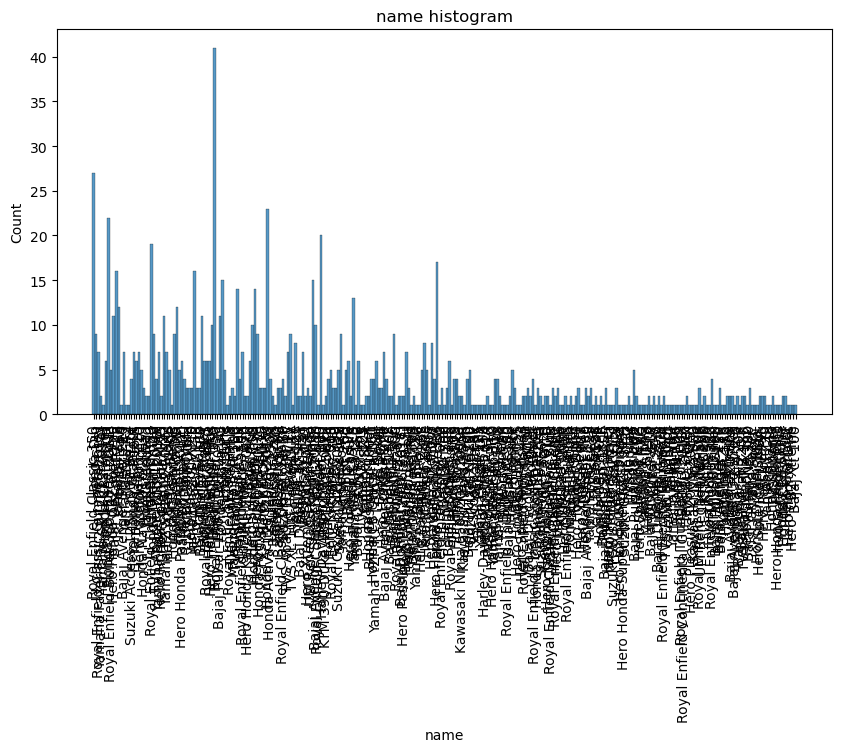

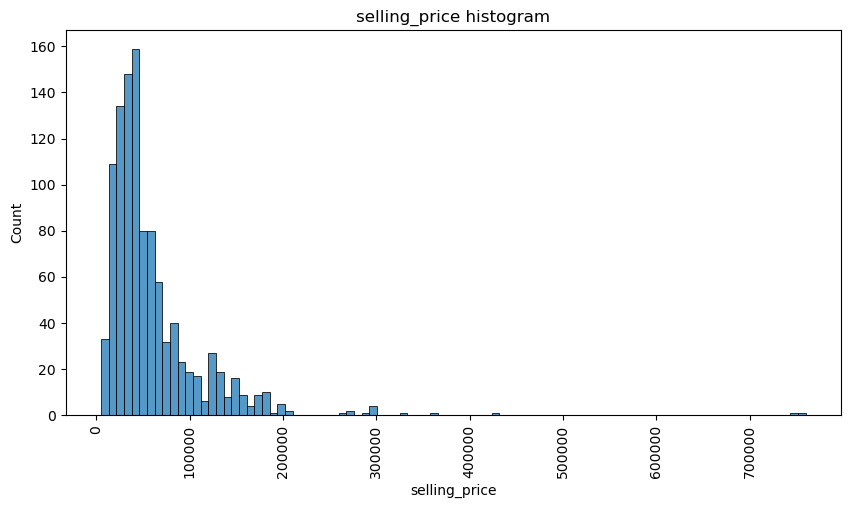

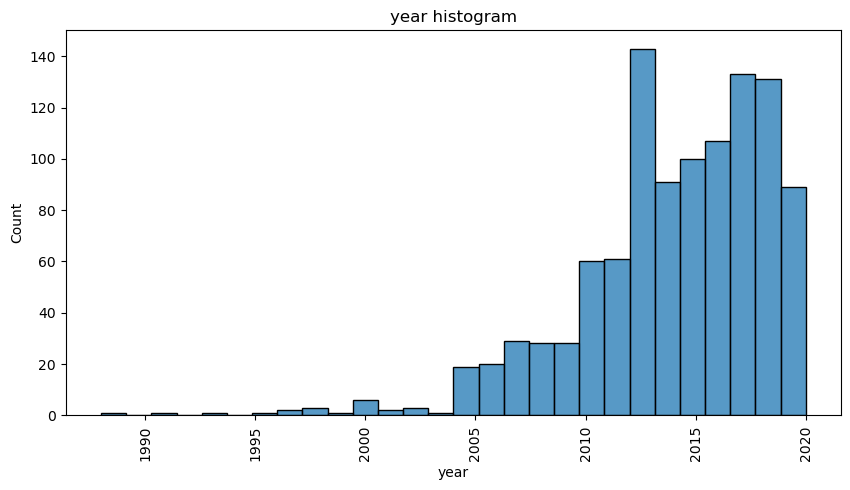

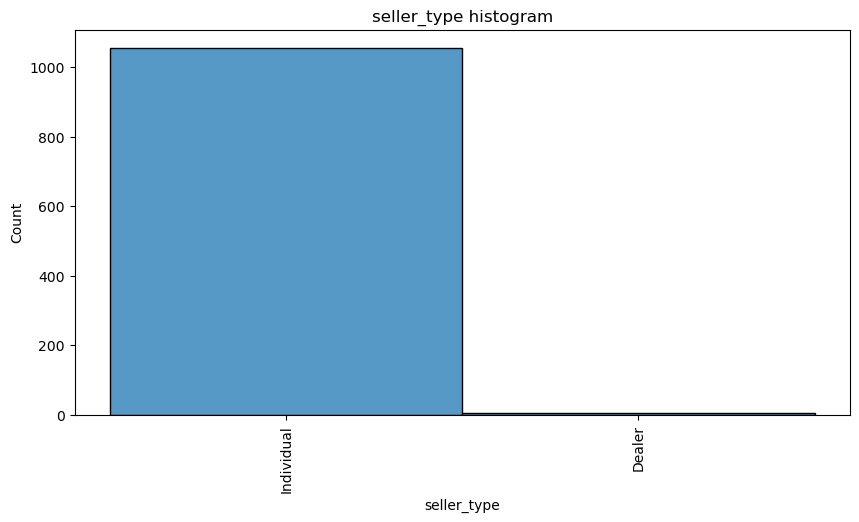

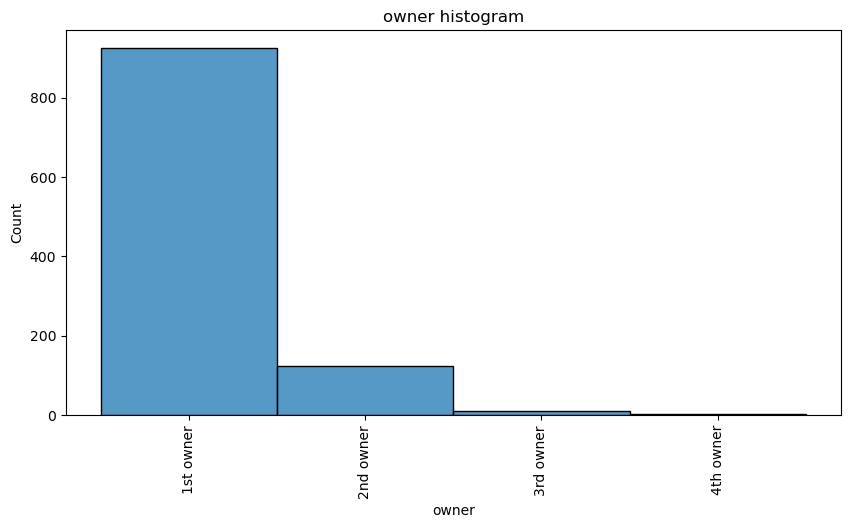

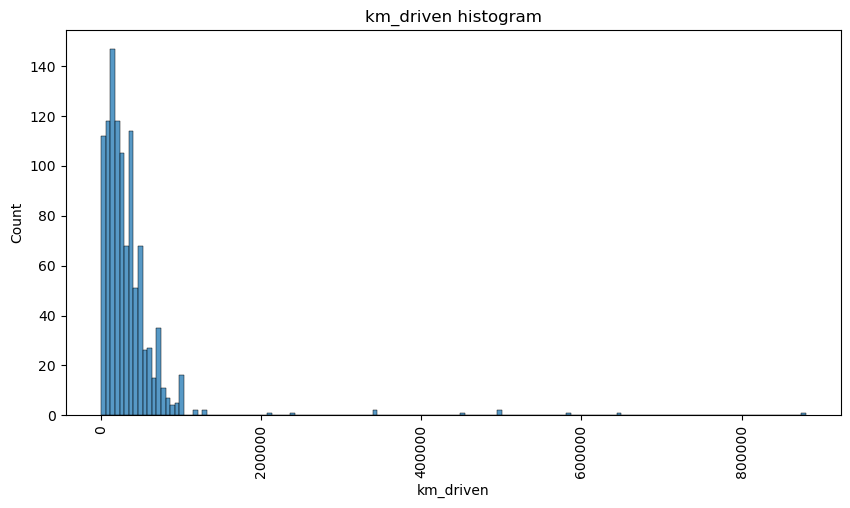

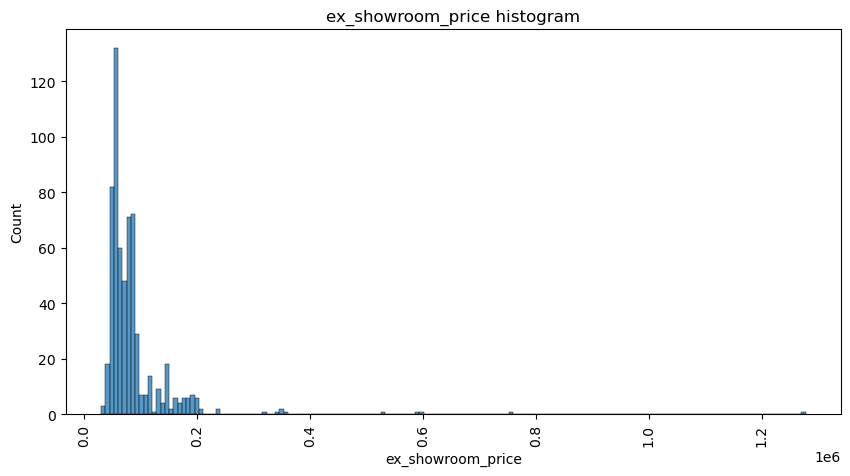

In [9]:
for col in data.columns:
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.tick_params(axis='x', rotation=90)
  plt.title(f'{col} histogram')
  sns.histplot(data=data, x=col, ax=ax)
  plt.show()

# Data Cleaning 

In [10]:
data.ex_showroom_price.fillna(data.ex_showroom_price.mean(), inplace=True)

# Null Values after Data Cleaning 

In [11]:
data.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

# Visualize "ex_showroom_price" Column after Data Cleaning

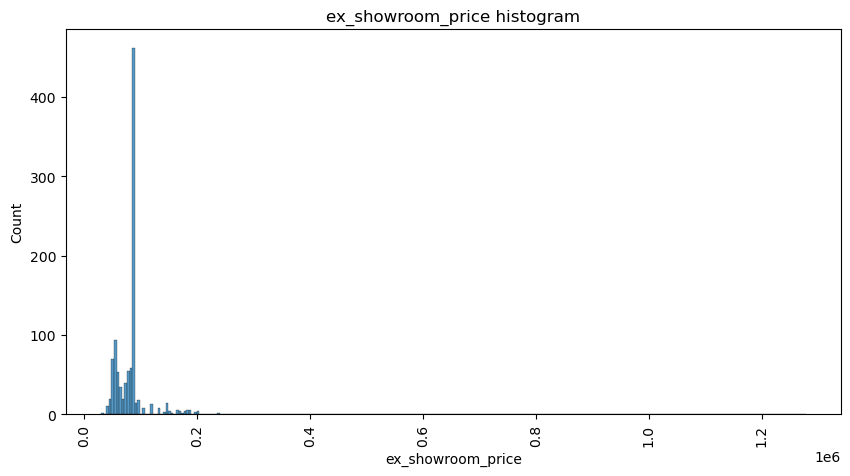

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.tick_params(axis='x', rotation=90)
plt.title(f'ex_showroom_price histogram')
sns.histplot(data=data, x=data.ex_showroom_price, ax=ax)
plt.show()

# "selling_price" VS "year"

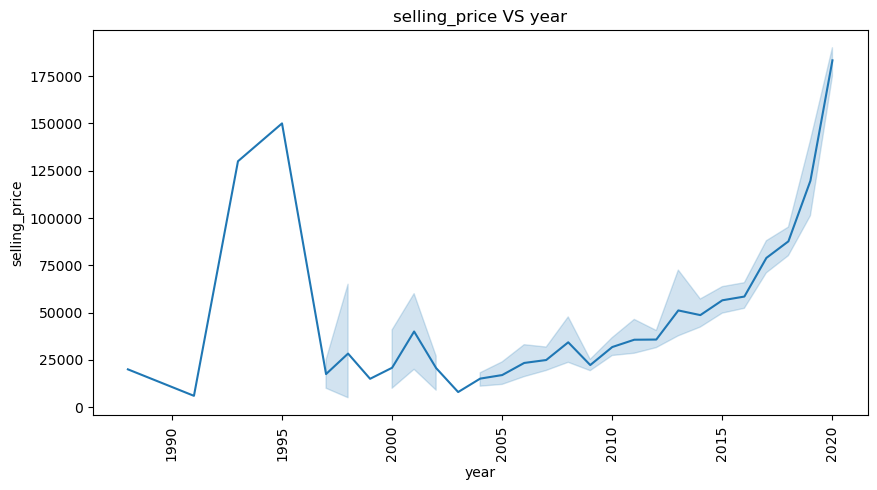

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.tick_params(axis='x', rotation=90)
plt.title('selling_price VS year')
sns.lineplot(data=data, y=data.selling_price, x=data.year)
plt.show()

# "selling_price" VS "seller_type"

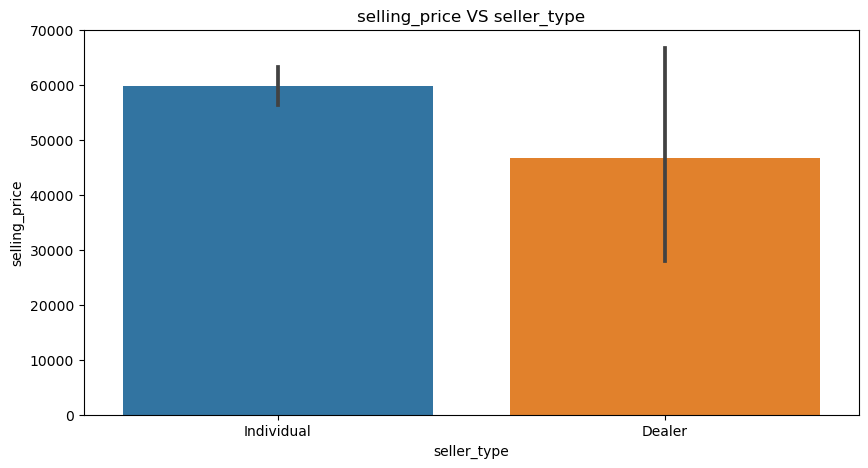

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('selling_price VS seller_type')
sns.barplot(data=data, y=data.selling_price, x=data.seller_type)
plt.show()